<a href="https://colab.research.google.com/github/Shrutijana/Early-Detection-of-Parkinson-s-Disease-through-Voice-Analysis-using-Machine-Learning/blob/main/Early_Detection_of_Parkinson's_Disease_through_Voice_Analysis_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Early Detection of Parkinson's Disease through Voice Analysis using Machine Learning**
This project aims to develop a machine learning model capable of accurately predicting the presence of Parkinson's disease in individuals based on voice recordings. Parkinson's disease, known for its impact on motor functions, presents symptoms such as tremors and muscular rigidity. Advanced computational techniques are utilized for early detection and potential monitoring through non-invasive voice analysis.

Key objectives include exploring the dataset, conducting extensive exploratory data analysis, preprocessing, model building, evaluating and comparing model performance.

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from termcolor import colored
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

##**Dataset**

In [9]:
df=pd.read_csv('/content/parkinsons.data')
print(df.shape,'\n')
df.head()# Hyperparameter Optimization for Logistic Regression Algorithms

(195, 24) 



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


##**Dataset Description**:
MDVP:Fo(Hz) -->	Mean fundamental frequency of the voice

MDVP:Fhi(Hz) -->	Maximum fundamental frequency of the voice

MDVP:Flo(Hz) -->	Minimum fundamental frequency of the voice

MDVP:Jitter(%)	--> Percentage variation in vocal fundamental frequency

MDVP:Jitter(Abs) -->	Absolute jitter value

MDVP:RAP -->	RAP measure of variation in fundamental frequency

MDVP:PPQ -->	PPQ measure of variation in fundamental frequency

Jitter:DDP -->	DDP measure of variation in fundamental frequency

MDVP:Shimmer -->	Shimmer measure of variation in amplitude

MDVP:Shimmer(dB) -->	Shimmer in dB

Shimmer:APQ3 -->	APQ3 measure of variation in amplitude

Shimmer:APQ5 -->	APQ5 measure of variation in amplitude

MDVP:APQ -->	APQ measure of variation in amplitude

Shimmer:DDA -->	DDA measure of variation in amplitude

NHR -->	Noise to harmonics ratio

HNR -->	Harmonics-to-noise ratio

status -->	Health status of subjects (1 for Parkinson's, 0 for healthy)

RPDE -->	Nonlinear dynamical complexity measure

D2	--> Nonlinear dynamical complexity measure

DFA -->	Signal fractal scaling exponent

spread1, spread2, PPE -->	Nonlinear measures of fundamental frequency variation

In [60]:
df = df.copy()   # creating a copy of loanDataOrg into loanData

targetCol = 'status'    # defining target column
targetColDf = df.pop(targetCol)   # popping target column from loanData df
df.insert(len(df.columns),targetCol, targetColDf)   # inserting target column to last column

# deleting variables that were used for changing column position of target column
del targetCol
del targetColDf

# converting column names into lower case
df.columns = [c.lower() for c in df.columns]
# replacing spaces in column names with '_'
df.columns = [c.replace(' ', '_') for c in df.columns]
# replacing ':' in column names with '_'
df.columns = [c.replace(':', '_') for c in df.columns]
# replacing '(' in column names with '_'
df.columns = [c.replace('(', '_') for c in df.columns]
# replacing ')' in column names with '' i.e blank
df.columns = [c.replace(')', '') for c in df.columns]
# replacing '%' in column names with 'in_percent'
df.columns = [c.replace('%', 'in_percent') for c in df.columns]

# to check the above printing top 5 rows
df.head()

,name,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


##**Dataset Overview**

In [ ]:
print(df.status)

##**Details Of Dataset**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    195 non-null    object 
 1   mdvp_fo_hz              195 non-null    float64
 2   mdvp_fhi_hz             195 non-null    float64
 3   mdvp_flo_hz             195 non-null    float64
 4   mdvp_jitter_in_percent  195 non-null    float64
 5   mdvp_jitter_abs         195 non-null    float64
 6   mdvp_rap                195 non-null    float64
 7   mdvp_ppq                195 non-null    float64
 8   jitter_ddp              195 non-null    float64
 9   mdvp_shimmer            195 non-null    float64
 10  mdvp_shimmer_db         195 non-null    float64
 11  shimmer_apq3            195 non-null    float64
 12  shimmer_apq5            195 non-null    float64
 13  mdvp_apq                195 non-null    float64
 14  shimmer_dda             195 non-null    fl

In [12]:
df.describe()

,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


##**Feature Analysis**
 mdvp_fo_hz: Represents the voice's fundamental frequency in hertz. The data shows a wide range with consistent values around the mean, suggesting minimal outliers.

mdvp_fhi_hz: Indicates the highest voice frequency with more variability compared to fundamental frequency, as seen in its higher standard deviation.

mdvp_flo(hz): Reflects the lowest voice frequency with notable variability, similar to mdvp_fhi_hz.

mdvp_Jitter(%): Measures percentage variation in fundamental frequency, displaying relatively consistent values with potential for slight variation.

mdvp_Jitter(abs): Shows absolute jitter values, generally consistent but may have outliers.

mdvp_rap and mdvp_ppq: Related to jitter aspects, with consistent values and potential for slight variation.

Jitter:DDP: Another jitter-related feature with characteristics similar to mdvp_rap and mdvp_ppq.

mdvp_Shimmer and mdvp_Shimmer(dB): Reflect measures of voice shimmer, showing moderate variability.

Shimmer_dda: Another shimmer measure with consistent distribution.

nhr: Represents noise-to-tonal balance, showing relatively consistent values across recordings.

hnr: Indicates harmonic-to-noise ratio, consistently distributed with higher mean.

status: Likely represents health status (1 for Parkinson's, 0 for healthy), with a significant portion indicating Parkinson's disease.

rpde and dfa: Numerical measures with moderate variability.

spread1 and spread2: Show moderate variability, with spread2 having a higher mean.

d2: Represents dimensionality reduction measure with moderate variability.

ppe: Related to nonlinear dynamical complexity, displaying moderate variability.

#**Preprocessing**

##**Handling Missing Values**

In [13]:
df.isna().sum()### is used to calculate the sum of missing values (NaN or null values)

name                      0
mdvp_fo_hz                0
mdvp_fhi_hz               0
mdvp_flo_hz               0
mdvp_jitter_in_percent    0
mdvp_jitter_abs           0
mdvp_rap                  0
mdvp_ppq                  0
jitter_ddp                0
mdvp_shimmer              0
mdvp_shimmer_db           0
shimmer_apq3              0
shimmer_apq5              0
mdvp_apq                  0
shimmer_dda               0
nhr                       0
hnr                       0
rpde                      0
dfa                       0
spread1                   0
spread2                   0
d2                        0
ppe                       0
status                    0
dtype: int64

##**Duplicate Record Detection**

In [14]:
df.duplicated().sum()

0

##**Finding Outliers & Skewness**

In [15]:
# checking skewness of the data
df.skew().sort_values(ascending=False)

<ipython-input-15-1701f675ac80>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().sort_values(ascending=False)


nhr                       4.220709
jitter_ddp                3.362058
mdvp_rap                  3.360708
mdvp_jitter_in_percent    3.084946
mdvp_ppq                  3.073892
mdvp_jitter_abs           2.649071
mdvp_apq                  2.618047
mdvp_fhi_hz               2.542146
mdvp_shimmer_db           1.999389
shimmer_apq5              1.798697
mdvp_shimmer              1.666480
shimmer_dda               1.580618
shimmer_apq3              1.580576
mdvp_flo_hz               1.217350
ppe                       0.797491
mdvp_fo_hz                0.591737
spread1                   0.432139
d2                        0.430384
spread2                   0.144430
dfa                      -0.033214
rpde                     -0.143402
hnr                      -0.514317
status                   -1.187727
dtype: float64

**Data Analysis and Scaling:**

**Note:** The dataset's independent variables are measured using various units (e.g., Hz, dB, %, absolute values), resulting in significant unit variation and wide value gaps. To mitigate this, data scaling techniques are necessary for normalization.

**Observations:**
- 'MDVP:Fo(Hz)' demonstrates a symmetrical distribution, centered around 0.
- 'spread1', 'spread2', and 'PPE' exhibit negative skewness, indicating a left-tailed distribution.
- Conversely, 'HNR', 'status', 'RPDE', and 'DFA' display positive skewness, with a right-tailed distribution.
- Most attributes show a notable rightward distribution from the median.

<ipython-input-16-98d5dedb3587>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature


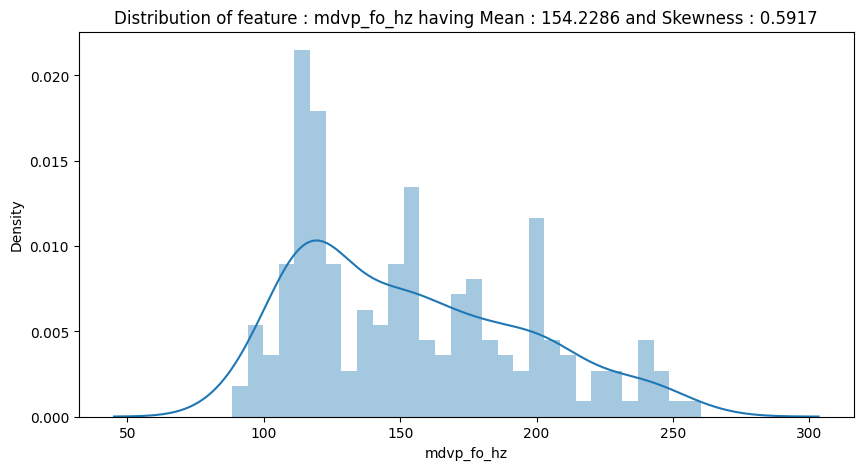

In [16]:
feature = 'mdvp_fo_hz'
meanData = 'Mean : ' + str(round(df[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(df[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

<ipython-input-17-ee5c8c05dd03>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
<ipython-input-17-ee5c8c05dd03>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, lab

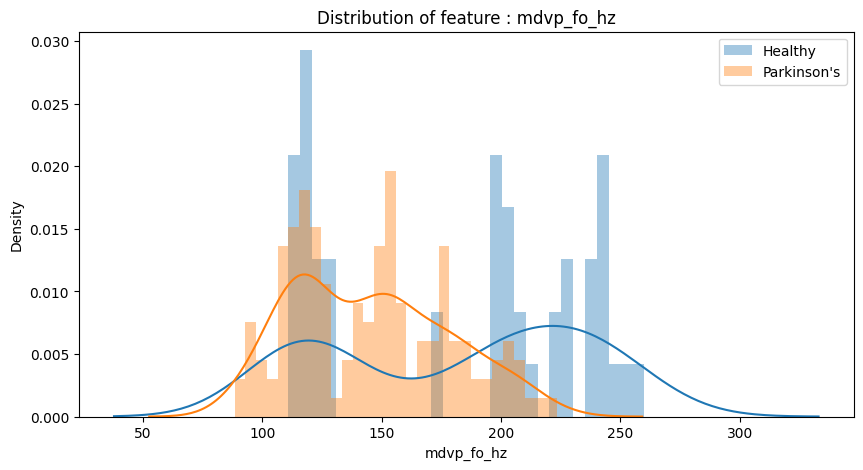

In [17]:
plt.figure(figsize=(10,5))     # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)    # setting title of the figure
plt.show()

status                         0           1
mdvp_fo_hz                                  
mdvp_fo_hz : 50-100     0.000000  100.000000
mdvp_fo_hz : 100-150   19.565217   80.434783
mdvp_fo_hz : 150-200   11.475410   88.524590
mdvp_fo_hz : 200-250   65.625000   34.375000
mdvp_fo_hz : 250-300  100.000000    0.000000


Text(0.5, 1.0, 'PD status with different mdvp_fo_hz group')

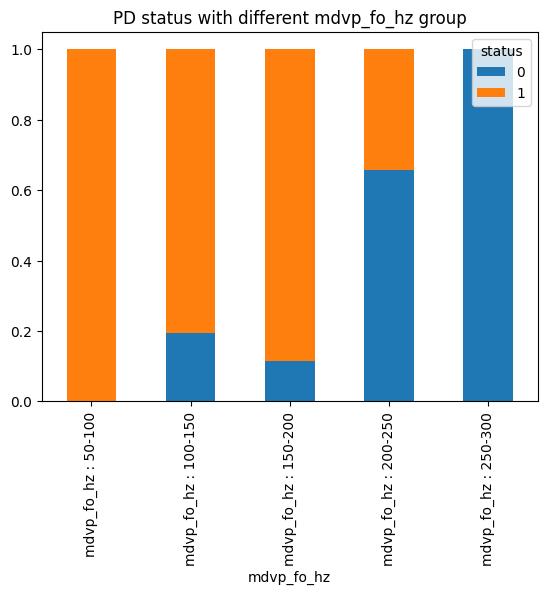

In [18]:
bins = [50,100,150,200,250,300]# defining mdvp_fo_hz bins,
# defining labels of mdvp_fo_hz groups as per bins defined as above
mdvp_fo_hz_group = ['mdvp_fo_hz : 50-100', 'mdvp_fo_hz : 100-150', 'mdvp_fo_hz : 150-200', 'mdvp_fo_hz : 200-250', 'mdvp_fo_hz : 250-300']
pdData_mdvp_fo_hz_bin = pd.cut(df.mdvp_fo_hz,bins,labels=mdvp_fo_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_fo_hz_group_col variable
mdvp_fo_hz_group_col = pd.crosstab(pdData_mdvp_fo_hz_bin,df.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_fo_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_fo_hz_group_col.div(mdvp_fo_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_fo_hz group")

​**Insights from Crosstab Analysis:**

Observations derived from the crosstab analysis reveal noteworthy patterns:

- All patients within the group of Average vocal fundamental frequency (mdvp_fo_hz) ranging between 50-100 exhibit Parkinson's disease.
- The group with Average vocal fundamental frequency (mdvp_fo_hz) between 150-200 demonstrates the second-highest prevalence of Parkinson's disease at 88.525%.
- Following closely, the group between 100-150 shows a Parkinson's prevalence of 80.435%.
- Conversely, the group with Average vocal fundamental frequency (mdvp_fo_hz) between 200-250 primarily consists of healthy patients, comprising 65.625% of the group.
- Lastly, patients within the 250-300 mdvp_fo_hz range are exclusively healthy.

These findings shed light on the association between vocal fundamental frequency and Parkinson's disease occurrence.

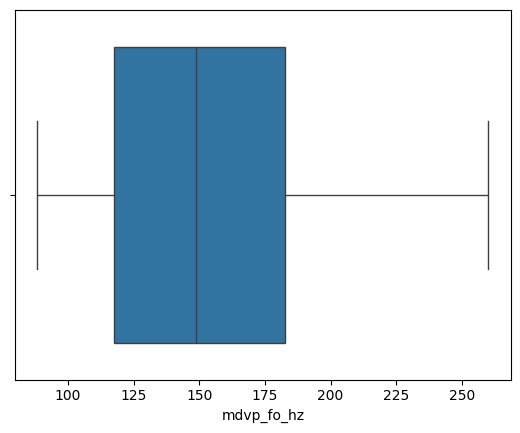

In [19]:
ax = sns.boxplot(x=df[feature])

<Axes: xlabel='status', ylabel='mdvp_fo_hz'>

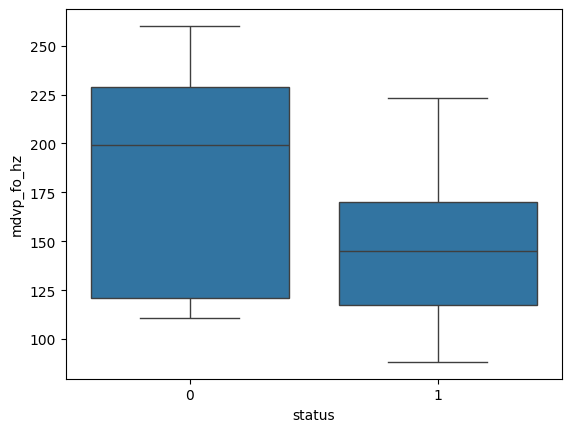

In [21]:
sns.boxplot(x=df['status'],y=df[feature])

<ipython-input-22-65b1859eab6b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature


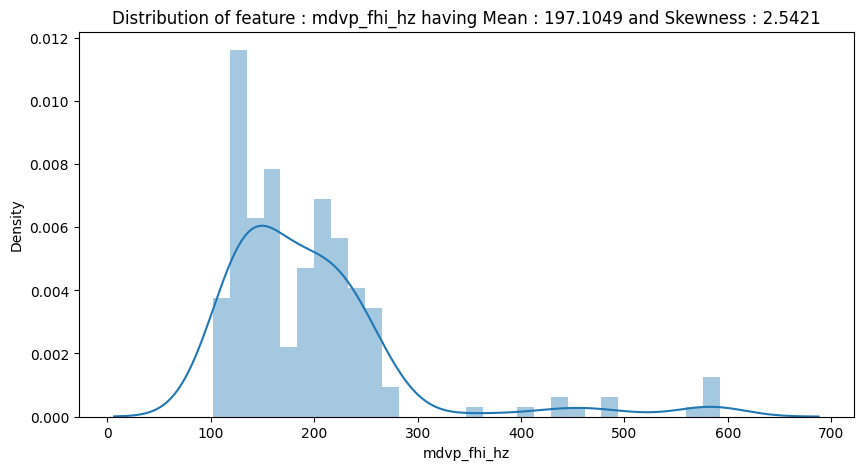

In [22]:
feature = 'mdvp_fhi_hz'
meanData = 'Mean : ' + str(round(df[feature].mean(),4))  # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(df[feature].skew(),4))  # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))    # setting figure size with width = 10 and height = 5
fig = sns.distplot(df[feature], bins=30, kde=True)   # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

<ipython-input-23-91f0ce7c0d77>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
<ipython-input-23-91f0ce7c0d77>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, lab

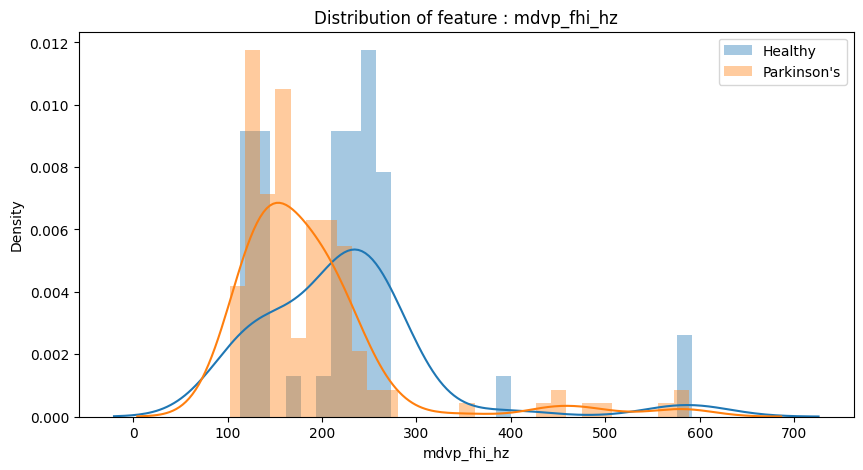

In [23]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                         0           1
mdvp_fhi_hz                                 
mdvp_fhi_hz : 100-200  12.931034   87.068966
mdvp_fhi_hz : 200-300  44.776119   55.223881
mdvp_fhi_hz : 300-400  50.000000   50.000000
mdvp_fhi_hz : 400-500   0.000000  100.000000
mdvp_fhi_hz : 500-600  40.000000   60.000000


Text(0.5, 1.0, 'PD status with different mdvp_fhi_hz group')

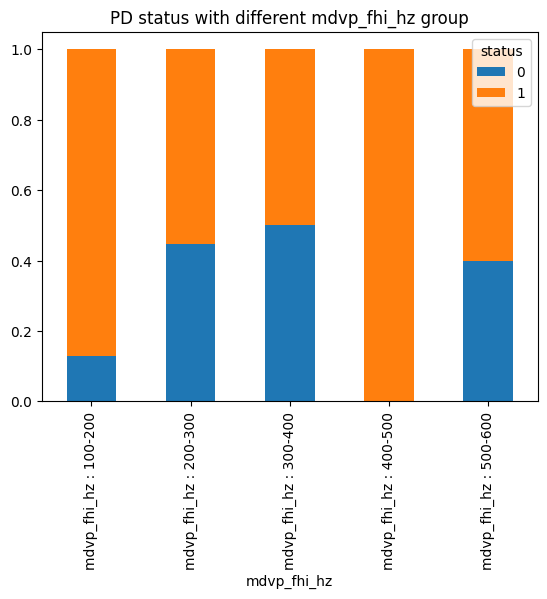

In [24]:
bins = [100,200,300,400,500,600]  # defining mdvp_fhi_hz bins,
# defining labels of mdvp_fhi_hz groups as per bins defined as above
mdvp_fhi_hz_group = ['mdvp_fhi_hz : 100-200', 'mdvp_fhi_hz : 200-300', 'mdvp_fhi_hz : 300-400', 'mdvp_fhi_hz : 400-500',
                     'mdvp_fhi_hz : 500-600']
pdData_mdvp_fhi_hz_bin = pd.cut(df[feature],bins,labels=mdvp_fhi_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_fhi_hz_group_col variable
mdvp_fhi_hz_group_col = pd.crosstab(pdData_mdvp_fhi_hz_bin,df.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_fhi_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_fhi_hz_group_col.div(mdvp_fhi_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_fhi_hz group")

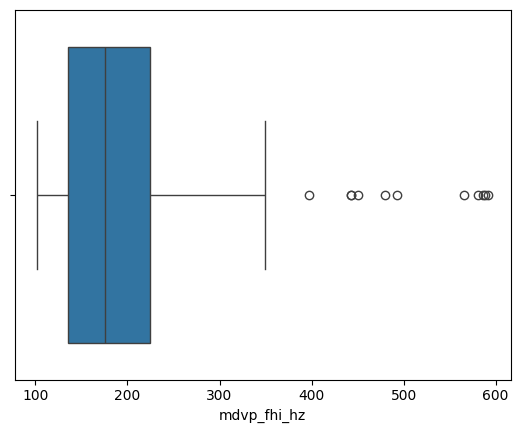

In [25]:
ax = sns.boxplot(x=df[feature])        # seaborn boxplot to examine outliers of the feature

<Axes: xlabel='status', ylabel='mdvp_fhi_hz'>

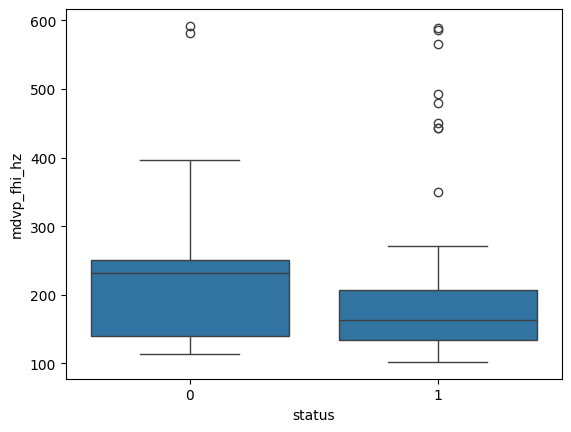

In [26]:
sns.boxplot(x=df['status'],y=df[feature])

In [27]:
Q1 = df[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = df[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = df[((df[feature] < (Q1 - 1.5 * IQR)) |(df[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(df[feature]),3),round(np.median(df[feature]),3),round(IQR,3))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/df[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_fhi_hz : Mean = 197.105, Median = 175.829 and Inter-Quartile-Range (IQR) = 89.343

*****************************************************************************************************************************
There are 11 outliers (5.641 % of the data points) in mdvp_fhi_hz feature and the values are [588.518, 586.567, 492.892, 442.557, 450.247, 442.824, 479.697, 565.74, 592.03, 581.289, 396.961]
*****************************************************************************************************************************


<ipython-input-28-3d6c7748b9ef>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature


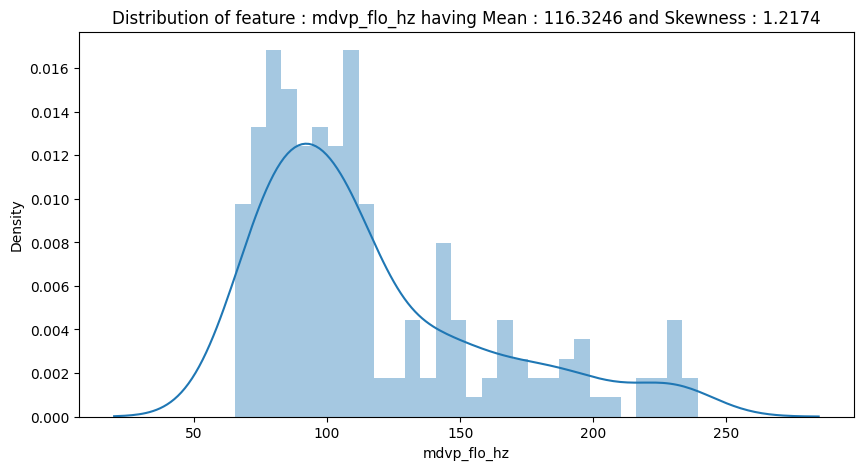

In [28]:
feature = 'mdvp_flo_hz'
meanData = 'Mean : ' + str(round(df[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(df[feature].skew(),4)) # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))     # setting figure size with width = 10 and height = 5
fig = sns.distplot(df[feature], bins=30, kde=True)   # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

<ipython-input-29-91f0ce7c0d77>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
<ipython-input-29-91f0ce7c0d77>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, lab

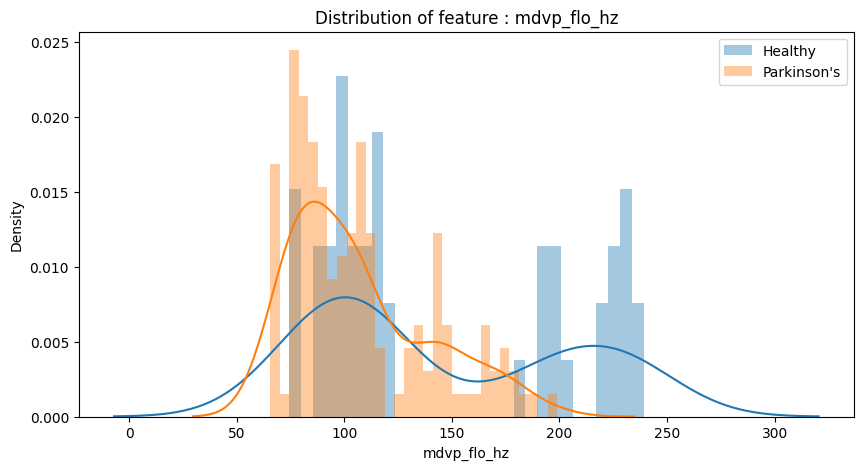

In [29]:
plt.figure(figsize=(10,5)) # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)  # setting title of the figure
plt.show()

status                          0          1
mdvp_flo_hz                                 
mdvp_flo_hz : 50-100    16.853933  83.146067
mdvp_flo_hz : 100-150   20.000000  80.000000
mdvp_flo_hz : 150-200   29.166667  70.833333
mdvp_flo_hz : 200-250  100.000000   0.000000


Text(0.5, 1.0, 'PD status with different mdvp_flo_hz group')

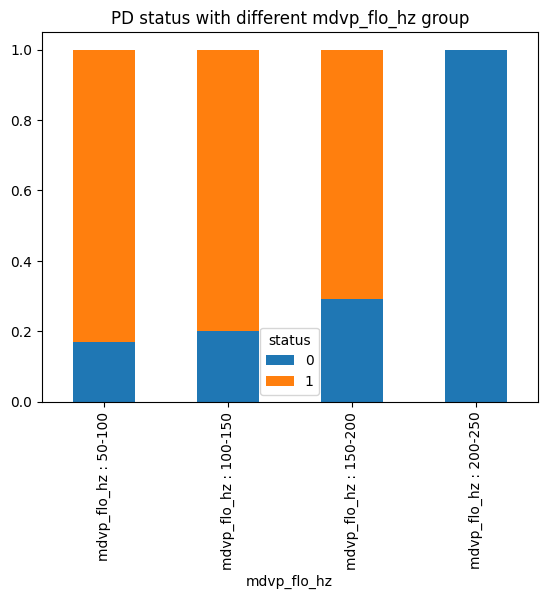

In [30]:
bins = [50,100,150,200,250]   # defining mdvp_flo_hz bins,
# defining labels of mdvp_flo_hz groups as per bins defined as above
mdvp_flo_hz_group = ['mdvp_flo_hz : 50-100', 'mdvp_flo_hz : 100-150', 'mdvp_flo_hz : 150-200', 'mdvp_flo_hz : 200-250']
pdData_mdvp_flo_hz_bin = pd.cut(df[feature],bins,labels=mdvp_flo_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_flo_hz_group_col variable
mdvp_flo_hz_group_col = pd.crosstab(pdData_mdvp_flo_hz_bin,df.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_flo_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_flo_hz_group_col.div(mdvp_flo_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_flo_hz group")

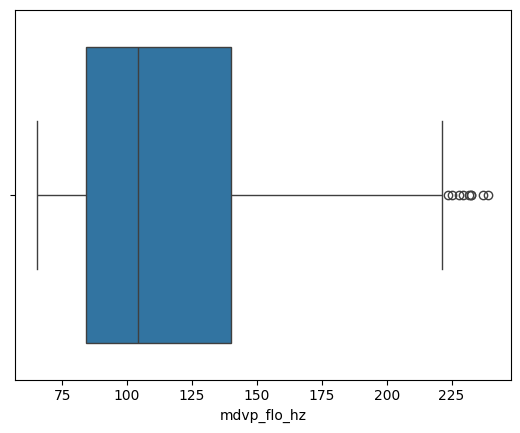

In [31]:
ax = sns.boxplot(x=df[feature])        # seaborn boxplot to examine outliers of the feature

<Axes: xlabel='status', ylabel='mdvp_flo_hz'>

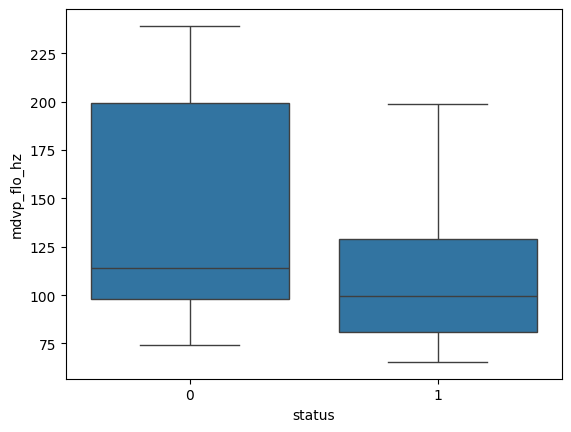

In [32]:
sns.boxplot(x=df['status'],y=df[feature])

##**Visualization**

In [33]:
df["status"].value_counts() ###is used to count the occurrences of each unique value in the "status" column of the DataFrame df

1    147
0     48
Name: status, dtype: int64

In [34]:
def plot_data(df, plot_type, grid_size, fig_size, y = None):
    fig = plt.figure(figsize = fig_size)
    column_names = df.select_dtypes(exclude='object').columns
    for i, column_name in enumerate(column_names):
        fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        if plot_type == 'hist':
            plot = sns.histplot(df[column_name], kde = True, color = 'darkblue')
        elif plot_type == 'boxplot':
             plot = sns.boxplot(y=df[column_name], x=y, color = 'red')
        else:
            raise ValueError("Input value for the parameter 'plot_type' should be 'hist' or 'boxplot'.")
        plot.set_xlabel(column_name, fontsize = 16)
    plt.tight_layout()

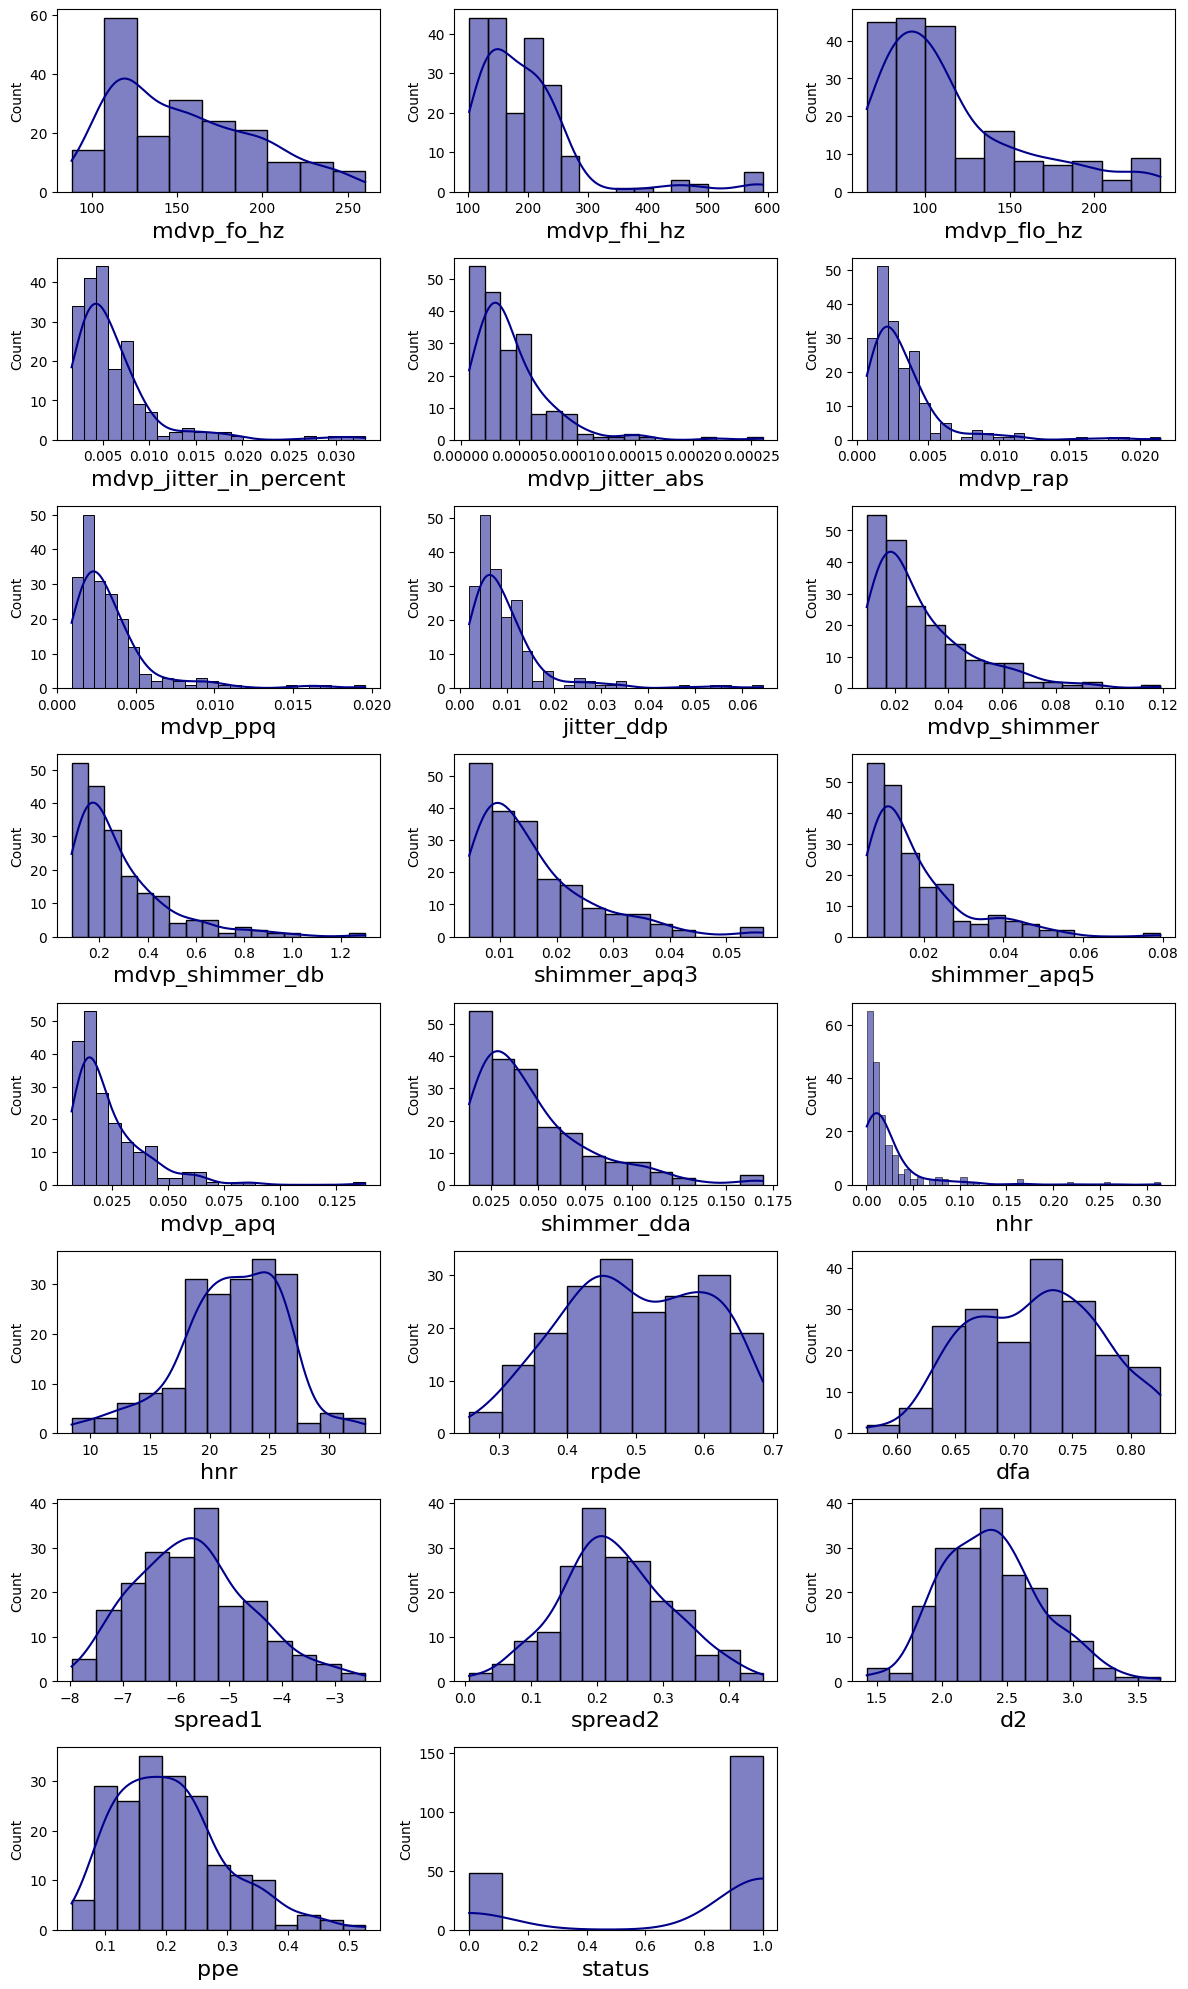

In [35]:
plot_data(df, plot_type = 'hist', grid_size = (8,3), fig_size = (12, 20))

<ipython-input-36-2ee848b74466>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.countplot(df, x='status', palette=['grey', 'blue'], edgecolor='black', linewidth=3, alpha=0.9)


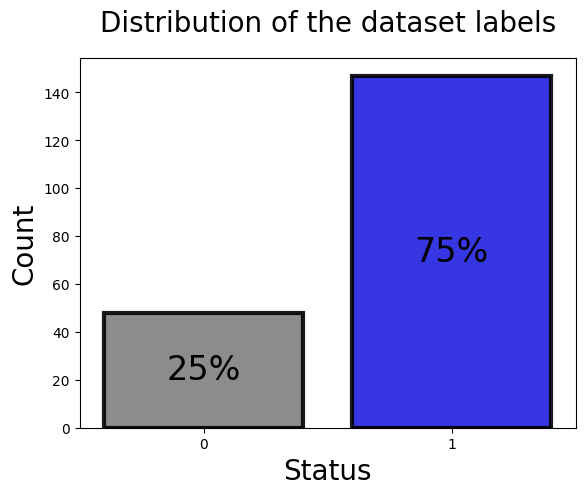

In [36]:
fig = sns.countplot(df, x='status', palette=['grey', 'blue'], edgecolor='black', linewidth=3, alpha=0.9)

total = len(df['status'])

for p in fig.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='center', va='center', color='Black', fontsize=24)

fig.set_xlabel('Status', fontsize=20, fontfamily='Book Antiqua')
fig.set_ylabel('Count', fontsize=20, fontfamily='Book Antiqua')

plt.title('Distribution of the dataset labels',y = 1.05, fontsize=20, fontfamily='Book Antiqua')
plt.show()

<ipython-input-37-9e4b9cd1aefc>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=cmap)


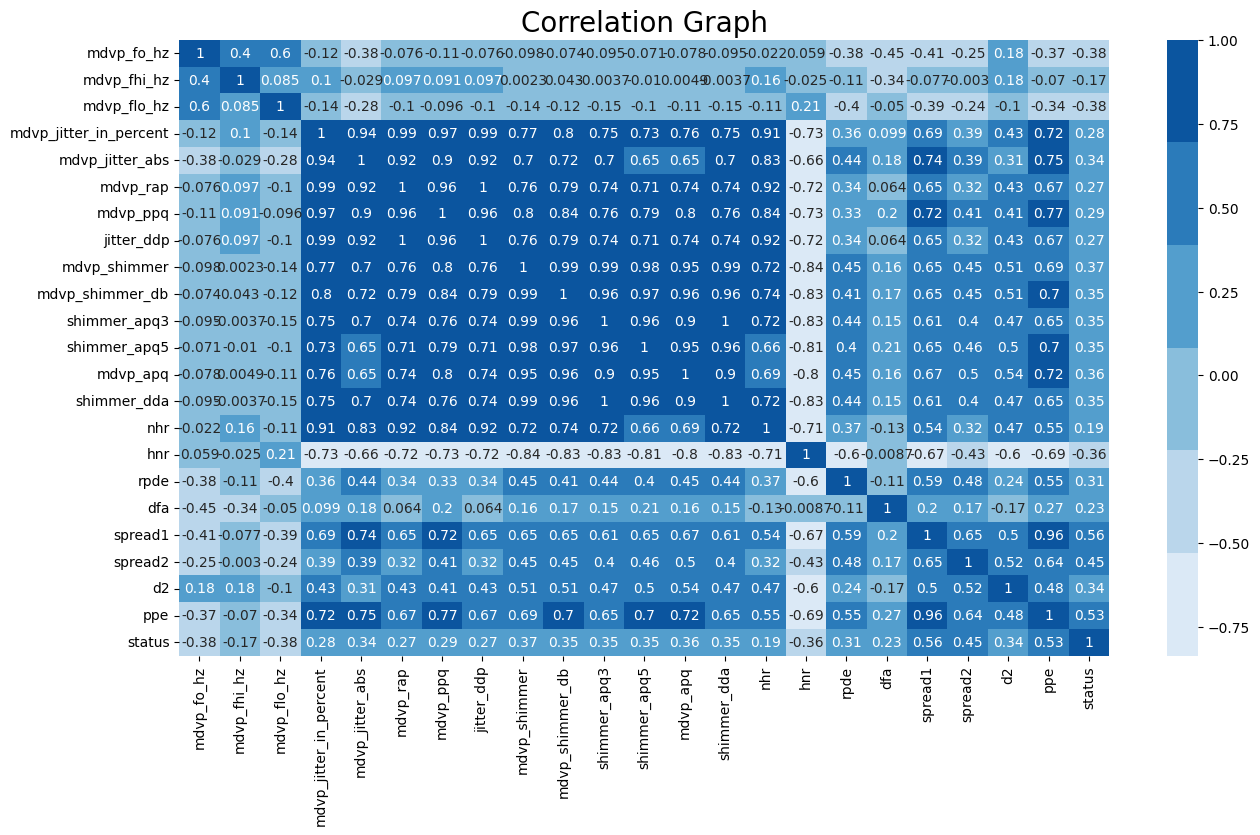

In [37]:
plt.figure(figsize=[15, 8], dpi=100)
plt.title("Correlation Graph", fontsize=20)

# Create a blue color map
cmap = sns.color_palette("Blues")

sns.heatmap(df.corr(), annot=True, cmap=cmap)

plt.show()

**Identifying Variable Correlations**

The depicted plot unveils notable correlations among several variables, including 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', and 'Shimmer:DDA'. Similarly, 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', and 'Jitter:DDP' also demonstrate strong correlations. This finding resonates with the data description, indicating these variables represent distinct measurements of the same underlying attribute.

In [39]:
correlation = df.corr()
status_corr = correlation.sort_values(by='status', ascending = False).iloc[:,-7]

<ipython-input-39-48c108062036>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [40]:
status_corr.to_frame().style.background_gradient(cmap='Blues')

,rpde
status,0.308567
spread1,0.591117
ppe,0.545886
spread2,0.479905
mdvp_shimmer,0.447424
mdvp_apq,0.451379
shimmer_apq5,0.399903
mdvp_shimmer_db,0.410684
shimmer_apq3,0.435242
shimmer_dda,0.435237


<ipython-input-41-3b6be81cce92>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['status'][:-1].sort_values().plot(kind='bar')


<Axes: >

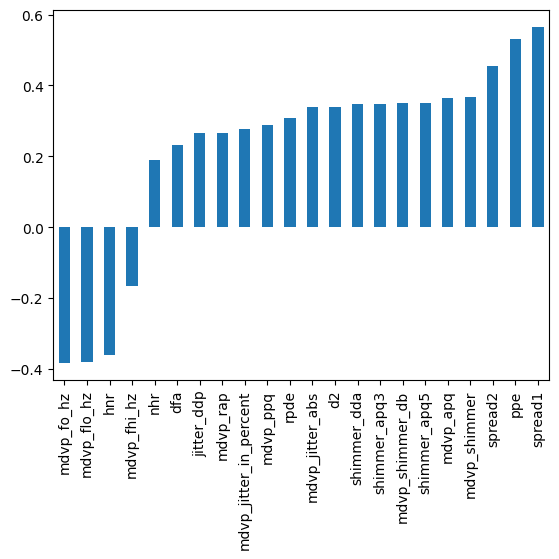

In [41]:
df.corr()['status'][:-1].sort_values().plot(kind='bar')

##**Modeling**

In [42]:
# Define the features (X) and the output labels (y)
X=df.drop(['name','status'],axis=1)
y=df["status"]
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create an instance of MinMaxScaler
minmax = MinMaxScaler()

X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) :
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(colored(" ❖ Testing Accuracy Score : ", attrs=['bold']),
          colored(f"{round(accuracy_score(Ytest, Ypredicted) * 100,2)}", color='black', attrs=['bold']))
    print(' • Precision Score is :', round(precision_score(Ytest, Ypredicted) * 100,2))
    print(' • Recall Score is :', round(recall_score(Ytest, Ypredicted) * 100,2))
    print(' • F1-Score Score is :', round(f1_score(Ytest, Ypredicted) * 100,2))
    print('-'*80)
    conf_matrix = confusion_matrix(Ytest,Ypredicted)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
    plt.title('Predicted Labels',y = 1.05, fontsize=20, fontfamily='Times New Roman')
    plt.ylabel('True Labels', labelpad=25, fontsize=20, fontfamily='Times New Roman')
    plt.show()
    print('-'*80)

##**Logestic Classification**

--------------------------------------------------------------------------------
Logistic Regression :
----------------

 • Training Accuracy Score :  85.26
 • Cross Validation Score : 83.87
 ❖ Testing Accuracy Score :  89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
--------------------------------------------------------------------------------


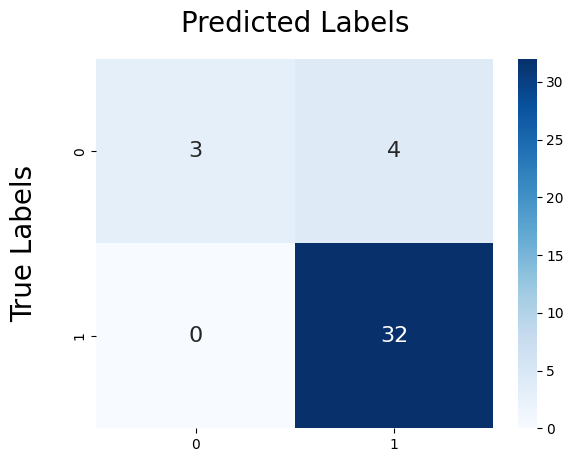

--------------------------------------------------------------------------------


In [43]:
LR = LogisticRegression()
LR.fit(X_train_scaled,y_train)
y_pred_LR = LR.predict(X_test_scaled)
print('-'*80)
print("Logistic Regression :")
print("-"*16)
Evaluate_Performance(LR, X_train_scaled, X_test_scaled, y_train, y_test)

In [44]:
cm=confusion_matrix(y_test,y_pred_LR)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[0,1]
FP=cm[1,0]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8974358974358975 
 The Missclassification = 1-Accuracy =  0.10256410256410253 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8888888888888888 
 Specificity or True Negative Rate = TN/(TN+FP) =  1.0 
 Positive Predictive value = TP/(TP+FP) =  1.0 
 Negative predictive Value = TN/(TN+FN) =  0.42857142857142855 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  inf 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.11111111111111116


<ipython-input-44-6f8daf59740f>:20: RuntimeWarning: divide by zero encountered in scalar divide
  'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',


##**SVM**

--------------------------------------------------------------------------------
Support Vector Machine:
----------------

 • Training Accuracy Score :  88.46
 • Cross Validation Score : 87.67
 ❖ Testing Accuracy Score :  89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
--------------------------------------------------------------------------------


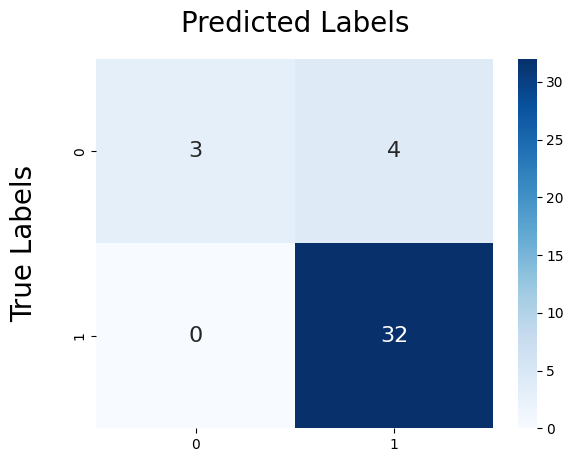

--------------------------------------------------------------------------------


In [45]:
SVM = SVC(probability=True, kernel = 'linear')
SVM.fit(X_train_scaled,y_train)
y_pred_SVM = SVM.predict(X_test_scaled)
print('-'*80)
print("Support Vector Machine:")
print("-"*16)
Evaluate_Performance(SVM, X_train_scaled, X_test_scaled, y_train, y_test)

##**Decision Tree Classifier**

--------------------------------------------------------------------------------
Decision Tree Classifier :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 87.87
 ❖ Testing Accuracy Score :  92.31
 • Precision Score is : 93.94
 • Recall Score is : 96.88
 • F1-Score Score is : 95.38
--------------------------------------------------------------------------------


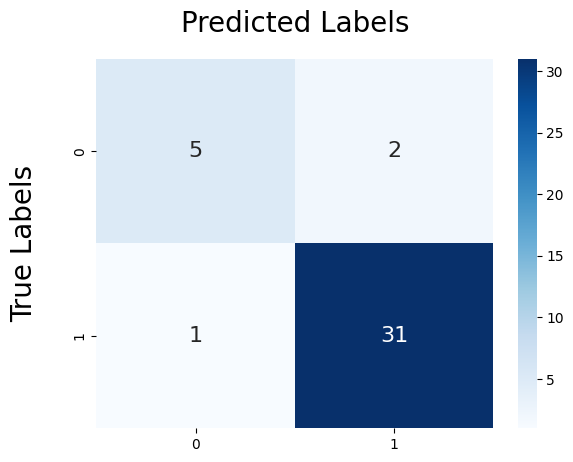

--------------------------------------------------------------------------------


DECISION TREE :


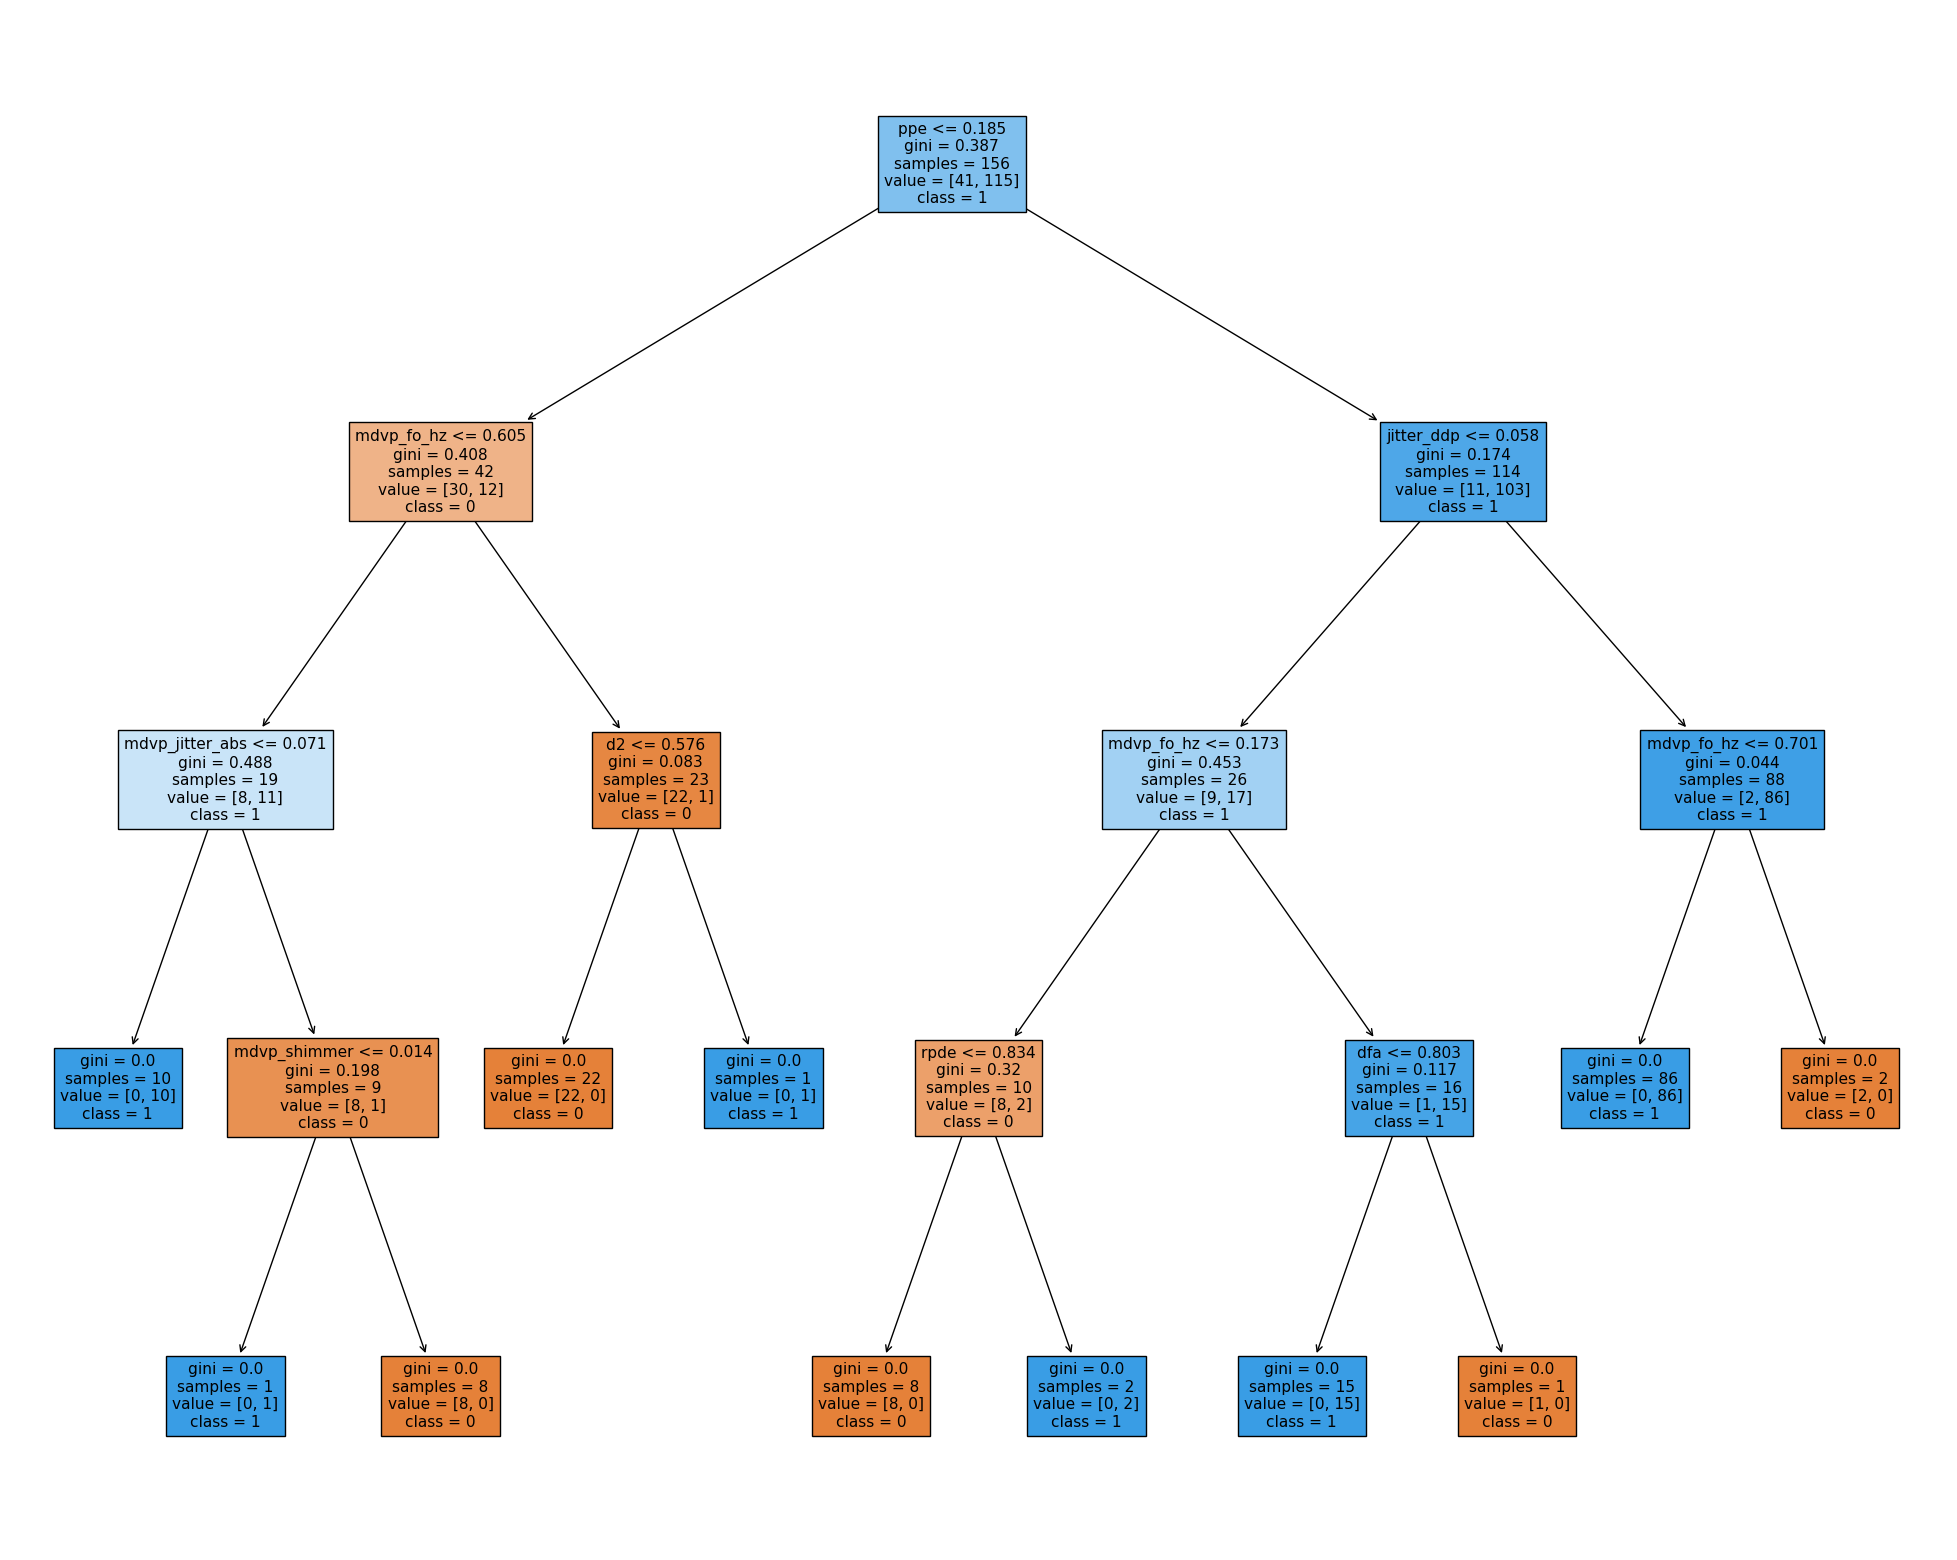

In [46]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train_scaled, y_train)
y_pred_DTC = DTC.predict(X_test_scaled)
print('-'*80)
print('Decision Tree Classifier :')
print("-"*16)
Evaluate_Performance(DTC, X_train_scaled, X_test_scaled, y_train, y_test)
print('\n')
print("DECISION TREE :")
fig = plt.figure(figsize=(25,20))
tree = plot_tree(DTC, feature_names = [ c for c in df.drop(['name'],axis=1).columns], class_names=['0','1'], filled=True)

In [48]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)
def tune_clf_hyperparameters(clf, param_grid, X_train_scaled, y_train, scoring='recall', n_splits=3):

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train_scaled, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)
best_dt, best_dt_hyperparams

(DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0),
 {'criterion': 'entropy',
  'max_depth': 2,
  'min_samples_leaf': 1,
  'min_samples_split': 2})

##**Random Forest Classifier**

--------------------------------------------------------------------------------
Random Forest Classifier
----------------



 • Training Accuracy Score :  100.0
 • Cross Validation Score : 90.96
 ❖ Testing Accuracy Score :  94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
--------------------------------------------------------------------------------


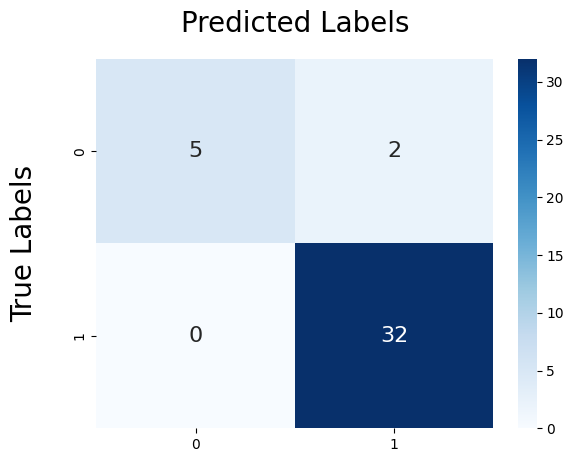

--------------------------------------------------------------------------------


In [49]:
RFC=RandomForestClassifier(n_estimators=150)
RFC.fit(X_train_scaled, y_train)
y_pred_RFC = RFC.predict(X_test_scaled)
print('-'*80)
print('Random Forest Classifier')
print("-"*16)
Evaluate_Performance(RFC, X_train_scaled, X_test_scaled, y_train, y_test)

##**K Neighbors Classifie**r

--------------------------------------------------------------------------------
Key- Nearest Neighbor :
----------------

 • Training Accuracy Score :  96.79
 • Cross Validation Score : 89.79
 ❖ Testing Accuracy Score :  94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
--------------------------------------------------------------------------------


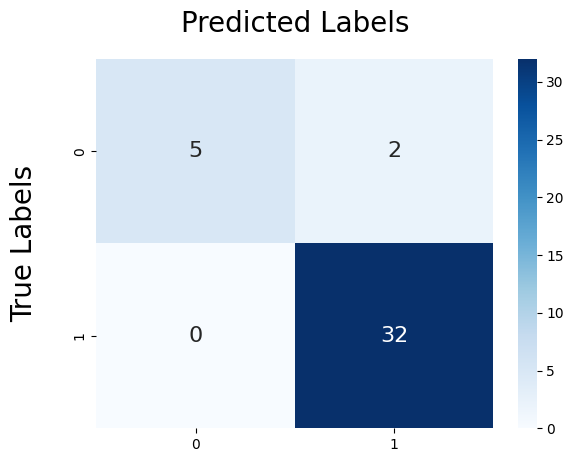

--------------------------------------------------------------------------------


In [50]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
y_pred_KNN = KNN.predict(X_test_scaled)
print('-'*80)
print("Key- Nearest Neighbor :")
print("-"*16)
Evaluate_Performance(KNN, X_train_scaled, X_test_scaled, y_train, y_test)

##**Conclusion**

In [51]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_pred_LR, y_pred_SVM, y_pred_DTC, y_pred_RFC, y_pred_KNN are your prediction arrays
models = [
    ('Logistic Regression', y_pred_LR),
    ('Support Vector Machine(linear)', y_pred_SVM),
    ('Decision Tree', y_pred_DTC),
    ('Random Forest', y_pred_RFC),
    ('K-Nearest Neighbor', y_pred_KNN)
]

results = []
for model_name, y_pred in models:
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    })


# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Define a function to highlight maximum values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlight_max function to the relevant columns
highlight_cols = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
results_df_highlighted = results_df.style.apply(highlight_max, subset=highlight_cols, axis=1)

print("Results without balancing the dataset:")
print('-' * 70)
display(results_df_highlighted)

Results without balancing the dataset:
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.888889,1.000000,0.941176,0.897436
1,Support Vector Machine(linear),0.888889,1.000000,0.941176,0.897436
2,Decision Tree,0.937500,0.937500,0.937500,0.897436
3,Random Forest,0.941176,1.000000,0.969697,0.948718
4,K-Nearest Neighbor,0.941176,1.000000,0.969697,0.948718


In [52]:
first_scenario_results = [
    {'Model': 'Logistic Regression', 'Precision': precision_score(y_test, y_pred_LR) , 'Recall': recall_score(y_test, y_pred_LR) ,
     'F1-Score': f1_score(y_test, y_pred_LR) , 'Accuracy': accuracy_score(y_test, y_pred_LR)},

    {'Model': 'Support Vector Machine(linear)', 'Precision': precision_score(y_test, y_pred_SVM), 'Recall': recall_score(y_test, y_pred_SVM),
     'F1-Score': f1_score(y_test, y_pred_SVM), 'Accuracy': accuracy_score(y_test, y_pred_SVM)},

    {'Model': 'Decision Tree', 'Precision': precision_score(y_test, y_pred_DTC), 'Recall': recall_score(y_test, y_pred_DTC),
     'F1-Score': f1_score(y_test, y_pred_DTC), 'Accuracy': accuracy_score(y_test, y_pred_DTC)},

    {'Model': 'Random Forest', 'Precision': precision_score(y_test, y_pred_RFC), 'Recall': recall_score(y_test, y_pred_RFC),
     'F1-Score': f1_score(y_test, y_pred_RFC), 'Accuracy': accuracy_score(y_test, y_pred_RFC)},

    {'Model': 'K-Nearest Neighbor', 'Precision': precision_score(y_test, y_pred_KNN), 'Recall': recall_score(y_test, y_pred_KNN),
     'F1-Score': f1_score(y_test, y_pred_KNN), 'Accuracy': accuracy_score(y_test, y_pred_KNN)},

]
first_scenario_results = pd.DataFrame(first_scenario_results).style.set_properties(**{'font-weight': 'bold'}, subset=pd.IndexSlice[[3,4], :])
print("Results without balancing the dataset : ")
print('-'*70)
first_scenario_results

Results without balancing the dataset : 
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.888889,1.000000,0.941176,0.897436
1,Support Vector Machine(linear),0.888889,1.000000,0.941176,0.897436
2,Decision Tree,0.937500,0.937500,0.937500,0.897436
3,Random Forest,0.941176,1.000000,0.969697,0.948718
4,K-Nearest Neighbor,0.941176,1.000000,0.969697,0.948718


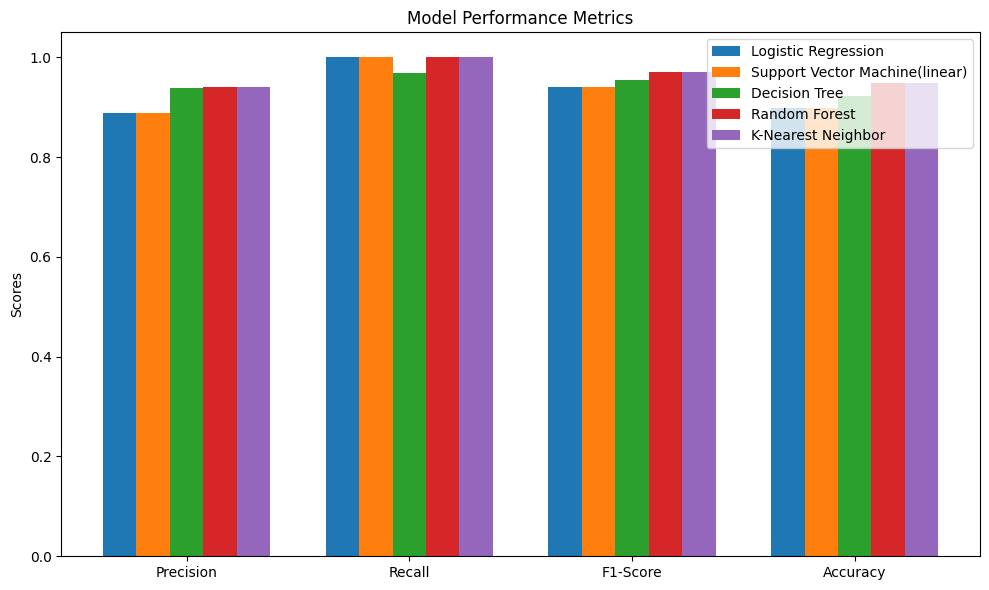

In [53]:
# result data
data = [
    {'Model': 'Logistic Regression', 'Precision': 0.888889, 'Recall': 1.000000, 'F1-Score': 0.941176, 'Accuracy': 0.897436},
    {'Model': 'Support Vector Machine(linear)', 'Precision': 0.888889, 'Recall': 1.000000, 'F1-Score': 0.941176, 'Accuracy': 0.897436},
    {'Model': 'Decision Tree', 'Precision': 0.939394, 'Recall': 0.968750, 'F1-Score': 0.953846, 'Accuracy': 0.923077},
    {'Model': 'Random Forest', 'Precision': 0.941176, 'Recall': 1.000000, 'F1-Score': 0.969697, 'Accuracy': 0.948718},
    {'Model': 'K-Nearest Neighbor', 'Precision': 0.941176, 'Recall': 1.000000, 'F1-Score': 0.969697, 'Accuracy': 0.948718}
]

# Create a DataFrame from the data
results_df = pd.DataFrame(data)

# Set the Model column as the index
results_df.set_index('Model', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
x = np.arange(len(metrics))
width = 0.15

for i, model in enumerate(results_df.index):
    values = results_df.loc[model, metrics]
    ax.bar(x + i * width, values, width, label=model)

ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x + (len(results_df) / 2 - 0.5) * width)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

​**Model Performance Analysis**

Logistic Regression and Support Vector Machine (Linear): Both models exhibit high precision, recall, and F1-scores, ranging from 0.89 to 0.94, with an accuracy of 0.897. This indicates proficient identification and prediction of positive instances.

Decision Tree: Demonstrating slightly higher precision and recall compared to linear models, with an F1-score of 0.953. It effectively captures data relationships, striking a balance between precision and recall.

Random Forest: With precision, recall, and F1-scores around 0.94 to 0.97 and an accuracy of 0.949, the random forest model performs comparably to the decision tree, potentially offering better generalization due to its ensemble nature.

K-Nearest Neighbor: Exhibits high precision, recall, and F1-scores akin to the decision tree and random forest models, with an accuracy of 0.949. It showcases similar performance to ensemble methods.

##**Neural Network**

In [54]:
model = Sequential()

model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')
from tensorflow.keras.callbacks import EarlyStopping
cb = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(x=X_train_scaled,y=y_train, validation_data=(X_test_scaled, y_test), batch_size=100, epochs=1000, callbacks=[cb])

Epoch 1/1000
2/2 [==============================] - 2s 258ms/step - loss: 0.5442 - val_loss: 0.4714
Epoch 2/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.5358 - val_loss: 0.4590
Epoch 3/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.5237 - val_loss: 0.4466
Epoch 4/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.5204 - val_loss: 0.4358
Epoch 5/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.4866 - val_loss: 0.4262
Epoch 6/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.5091 - val_loss: 0.4182
Epoch 7/1000
2/2 [==============================] - 0s 77ms/step - loss: 0.5249 - val_loss: 0.4113
Epoch 8/1000
2/2 [==============================] - 0s 64ms/step - loss: 0.4957 - val_loss: 0.4061
Epoch 9/1000
2/2 [==============================] - 0s 79ms/step - loss: 0.4851 - val_loss: 0.4020
Epoch 10/1000
2/2 [==============================] - 0s 74ms/step - loss: 0.4594 - val_loss: 0.3984
Epoch 11

<Axes: >

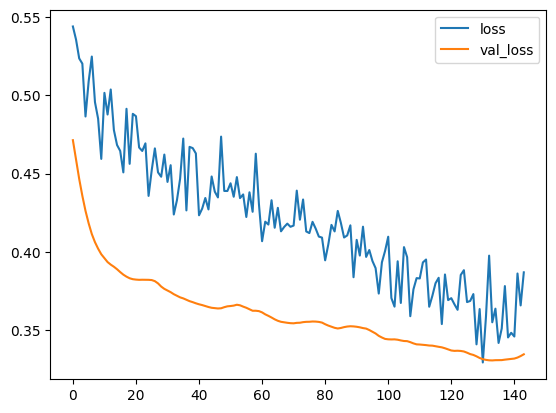

In [55]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [56]:
predictions = (model.predict(X_test_scaled) > 0.5).astype("int32")

2/2 [==============================] - 0s 7ms/step


In [57]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(confusion_matrix(y_test,predictions))

[[ 3  4]
 [ 0 32]]


In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



In [59]:
print(accuracy_score(y_test,predictions))

0.8974358974358975
